Домашнее задание к семинару № 3 от 09-02-2024:
1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
** Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

Ответ на задачу № 1: Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

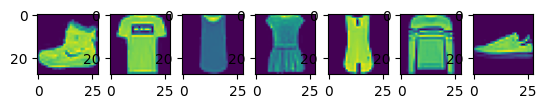

In [5]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)

In [7]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Самая лучшая модель (модель № 4), полученная на семинаре, показывала следующие результаты: loss: 0.0891 - accuracy: 0.9662 - val_loss: 0.2974 - val_accuracy: 0.9137

Предложения по улучшению модели:
1. провел эксперименты по использованию различных вариантов дополнения входных данных в сверточных слоях, т.е. изменял параметр padding c same на valid
2. провел эксперименты по использованию различных функций активации, использовал: Leaky ReLU и ELU (Exponential Linear Unit)
3. провел эксперименты по использованию различных оптимизаторов при компиляции модели, использовал наиболее подходящие для разпознования подобных изображений оптимизаторы - Adadelta (Adaptive Delta) и Nadam (Nesterov-accelerated Adaptive Moment Estimation)
4. Также проэксперементировал с гиперпараметрами модели - менял количество сверточных слоёв.

Наилучшие результаты получены при:
1. Использовании прямого указания о размерности входных данных в первый сверточный слой - применение аргумента input_shape = (28, 28, 3).
2. Использование оптимизатора Adadelta (Adaptive Delta) - это алгоритм, который динамически адаптирует скорость обучения с течением времени без необходимости задания начальной скорости обучения.

Выводы: результаты работы СНС улучшены до показателей: loss: 0.0501 - accuracy: 0.9826 - val_loss: 0.2730 - val_accuracy: 0.9220

In [20]:
model_4_modified = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2, input_shape = (28, 28, 3)),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [23]:
model_4_modified.compile(optimizer='adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
%%time

history = model_4_modified.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0647 - accuracy: 0.9762 - val_loss: 0.2746 - val_accuracy: 0.9196
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0618 - accuracy: 0.9776 - val_loss: 0.2737 - val_accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9783 - val_loss: 0.2732 - val_accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0577 - accuracy: 0.9790 - val_loss: 0.2728 - val_accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0560 - accuracy: 0.9798 - val_loss: 0.2727 - val_accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0546 - accuracy: 0.9806 - val_loss: 0.2727 - val_accuracy: 0.9215
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0532 - accuracy: 0.9813 - val_loss: 0.2727 - val_accuracy

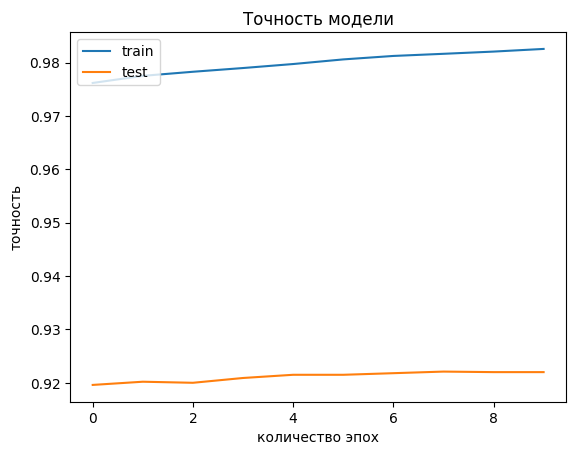

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

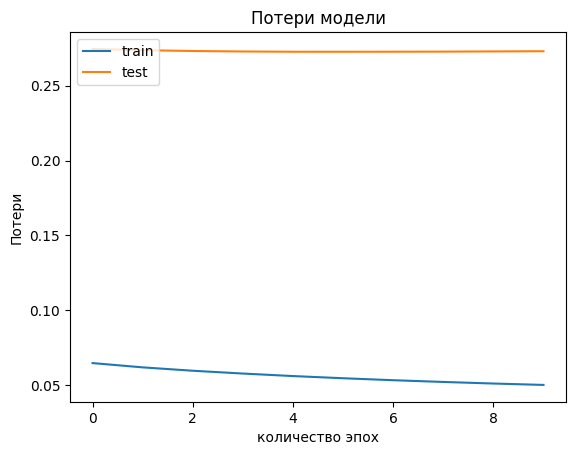

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model_4_modified.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 3, 3, 128)        

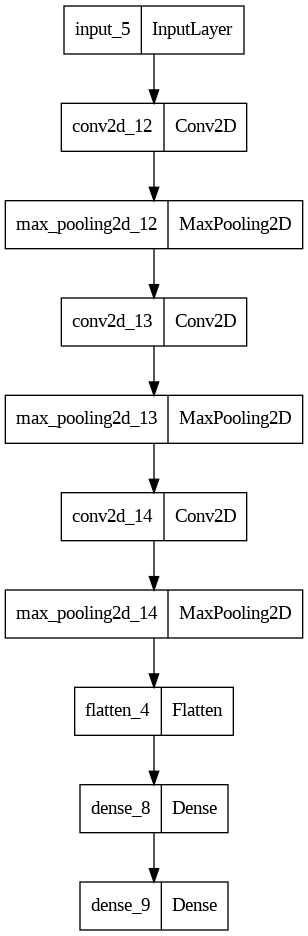

In [28]:
keras.utils.plot_model(model_4_modified)

Ответ на задачу № 2: Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность.

In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [30]:
### загрузка набора исходных данных
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split=(tfds.Split.TRAIN, tfds.Split.TEST), with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteP6XYJA/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteP6XYJA/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteP6XYJA/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [31]:
### Предобработка входных данных: буферизация, установление параметров заполнения (padding) и пакетирования (batching) данных.
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [32]:
### Построение модели
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(info.features['text'].encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
### Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
### Обучение модели
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
391/391 [==============================] - 109s 261ms/step - loss: 0.5294 - accuracy: 0.7355 - val_loss: 0.5190 - val_accuracy: 0.7470
Epoch 2/10
391/391 [==============================] - 87s 222ms/step - loss: 0.3735 - accuracy: 0.8492 - val_loss: 0.4138 - val_accuracy: 0.8245
Epoch 3/10
391/391 [==============================] - 78s 199ms/step - loss: 0.2879 - accuracy: 0.8896 - val_loss: 0.4084 - val_accuracy: 0.8337
Epoch 4/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2401 - accuracy: 0.9094 - val_loss: 0.3912 - val_accuracy: 0.8399
Epoch 5/10
391/391 [==============================] - 66s 170ms/step - loss: 0.2162 - accuracy: 0.9176 - val_loss: 0.4268 - val_accuracy: 0.8317
Epoch 6/10
391/391 [==============================] - 54s 139ms/step - loss: 0.1632 - accuracy: 0.9406 - val_loss: 0.4904 - val_accuracy: 0.8291
Epoch 7/10
391/391 [==============================] - 50s 127ms/step - loss: 0.1414 - accuracy: 0.9500 - val_loss: 0.5522 - val_a

In [35]:
### Тестирование (оценка) модели
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

391/391 [==============================] - 13s 33ms/step - loss: 0.6096 - accuracy: 0.8325
Test Loss: 0.6095687747001648, Test Accuracy: 0.8325200080871582


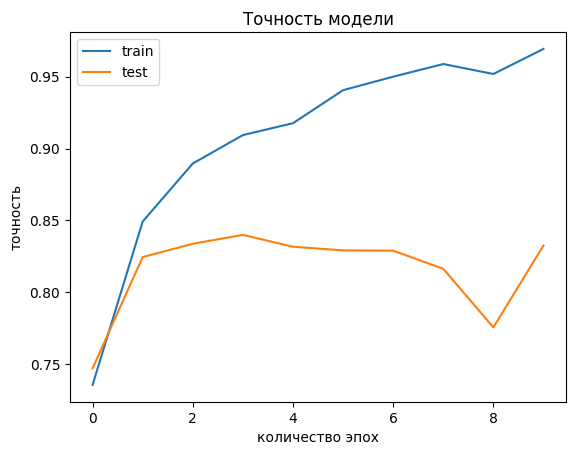

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

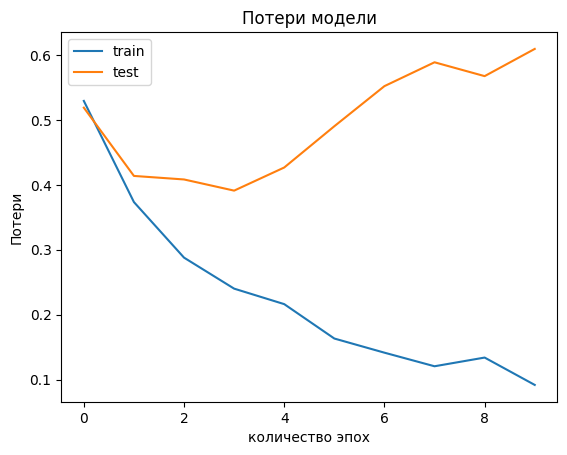

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

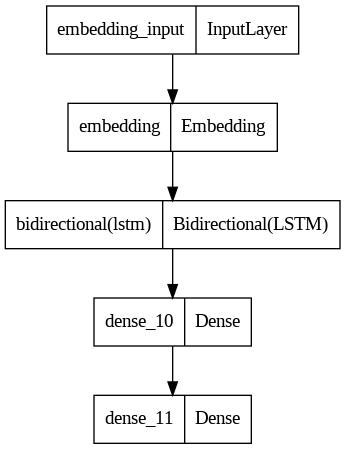

In [38]:
keras.utils.plot_model(model)

Вывод о созданной модели: хотя при обучении модель показывает хорошие результаты: loss: 0.0917 - accuracy: 0.9693, но на тестовых данных она значительно снижает свою точность: Тest Loss: 0.6095, Test Accuracy: 0.8325 и, следовательно, нуждается в улучшении.